Silhouette Score: 0.041198975280256636


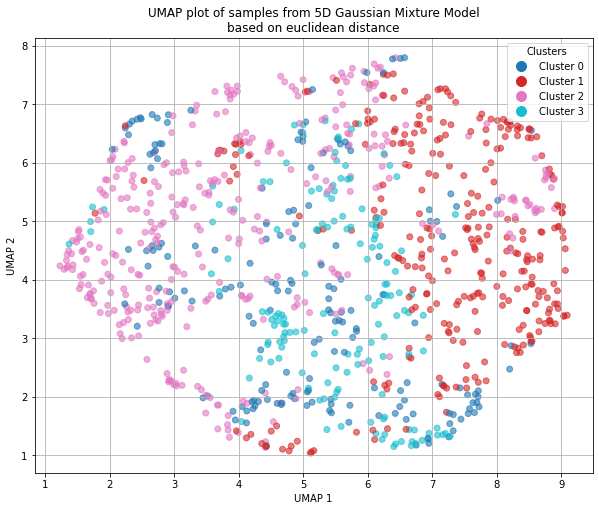

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import umap
from sklearn import metrics

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Parameters for the Gaussian components in 5D
means = np.array([[0, 0, 0, 0, 0], 
                  [0.2, 0, 0, 0, 0.2], 
                  [-0.1, -0.1, -0.1, -0.1, -0.1], 
                  [0.2, -0.2, 0.2, -0.2, 0.2]])  # Four means

# Constructing positive-definite covariance matrices with increased off-diagonal elements
covariances = []
for i in range(4):
    cov = np.array([[0.5, 0.2, 0.1, 0.1, 0.1], 
                    [0.2, 0.5, 0.1, 0.1, 0.1], 
                    [0.1, 0.1, 0.5, 0.1, 0.1], 
                    [0.1, 0.1, 0.1, 0.5, 0.1], 
                    [0.1, 0.1, 0.1, 0.1, 0.5]])
    # Ensure the matrices are positive-definite by adding a small value to the diagonal
    cov += np.eye(5) * 0.1
    covariances.append(cov)

# Generate initial data for fitting
initial_data = np.vstack([np.random.multivariate_normal(mean, cov, n_samples // 4)
                          for mean, cov in zip(means, covariances)])

# Create the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, means_init=means)

# Fit the GMM
gmm.fit(initial_data)

# Generate samples from the GMM
samples, _ = gmm.sample(n_samples)

# Calculate the posterior probabilities of each sample belonging to each cluster
posterior_probabilities = gmm.predict_proba(samples)

# Assign labels based on the highest responsibility cluster
labels = np.argmax(posterior_probabilities , axis=1)


# Calculate silhouette score
sil_score = metrics.silhouette_score(samples, labels)
print(f'Silhouette Score: {sil_score}')


# Use UMAP to reduce dimensionality to 2D for plotting
reducer = umap.UMAP()
embedding = reducer.fit_transform(samples)

# Plot the samples in 2D using UMAP
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.title('UMAP plot of samples from 5D Gaussian Mixture Model\nbased on euclidean distance')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)

# Create legend manually with correct colors
unique_labels = np.unique(labels)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]
handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=f'Cluster {label}') for color, label in zip(colors, unique_labels)]

plt.legend(handles=handles, title="Clusters")
plt.show()





Silhouette Score: 0.2787687488225499


/home/qiujiaju/.local/lib/python3.9/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


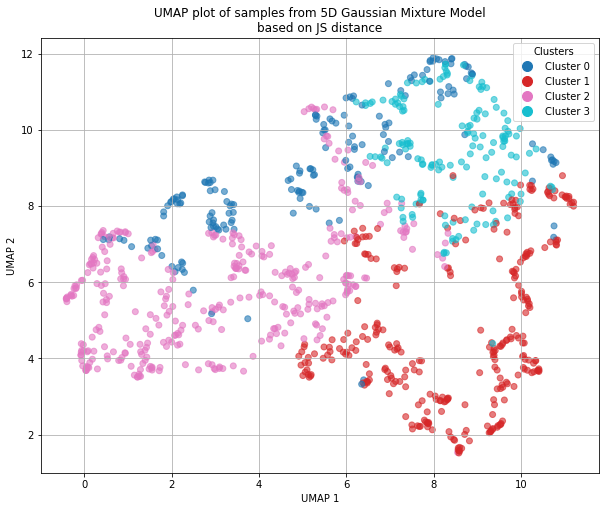

In [4]:
from scipy.spatial.distance import jensenshannon
def js_divergence(p, q):
    return jensenshannon(p, q) ** 2
    
num_samples=samples.shape[0]
js_matrix = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(num_samples):
        if i != j:
            js_matrix[i, j] = js_divergence(posterior_probabilities[i], posterior_probabilities[j])
        else:
            pass


# Calculate silhouette score
sil_score = metrics.silhouette_score(js_matrix, labels,metric="precomputed")
print(f'Silhouette Score: {sil_score}')

embedding = umap.UMAP(metric='precomputed').fit_transform(js_matrix)

# Plot the samples in 2D using UMAP
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.title('UMAP plot of samples from 5D Gaussian Mixture Model\nbased on JS distance')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)

# Create legend manually with correct colors
unique_labels = np.unique(labels)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]
handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=f'Cluster {label}') for color, label in zip(colors, unique_labels)]

plt.legend(handles=handles, title="Clusters")
plt.show()